# Running logistic regression and linear discriminant analysis on starbucks data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Adding and Editing Data

In [2]:
offers = pd.read_csv('offers_transformed.csv')
portfolio = pd.read_csv('portfolio_transformed.csv')
profile = pd.read_csv('profile_transformed.csv')

In [3]:
offers = offers.drop(columns=['Unnamed: 0'])
offers.head()

,person,received,received time,offer_id,viewed,viewed time,completed,completed time,reward,transaction,transaction time,amount
0,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1,132.0,5.0,1,132.0,19.89
1,a03223e636434f42ac4c3df47e8bac43,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,6.0,0,NaN,NaN,0,NaN,NaN
2,a03223e636434f42ac4c3df47e8bac43,1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,624.0,0,NaN,NaN,0,NaN,NaN
3,e2127556f4f64592b11af22de27a7932,1,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,0,NaN,NaN,0,NaN,NaN
4,8ec6ce2a7e7949b1bf142def7d0e0586,1,0,fafdcd668e3743c1bb461111dcafc2a4,1,12.0,0,NaN,NaN,0,NaN,NaN


In [4]:
portfolio = portfolio.drop(columns=['Unnamed: 0'])
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,social,mobile,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,0,1,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [5]:
profile = profile.drop(columns=['Unnamed: 0'])
profile.head()

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [6]:
full = offers.merge(portfolio, how = 'left', left_on = 'offer_id', right_on = 'id')

In [7]:
full = full.merge(profile, how = 'inner', left_on = 'person', right_on = 'id')

In [8]:
full.head()

,person,received,received time,offer_id,viewed,viewed time,completed,completed time,reward_x,transaction,...,id_x,email,social,mobile,web,gender,age,id_y,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,6.0,1,132.0,5.0,1,...,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,1,168,5a8bc65990b245e5a138643cd4eb9837,1,216.0,0,NaN,NaN,0,...,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,1,408,ae264e3637204a6fb9bb56bc8210ddfd,1,408.0,1,510.0,10.0,1,...,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,1,504,f19421c1d4aa40978ebb69ca19b0e20d,1,582.0,1,510.0,5.0,1,...,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,e2127556f4f64592b11af22de27a7932,1,0,2906b810c7d4411798c6938adc9daaa5,1,18.0,0,NaN,NaN,0,...,2906b810c7d4411798c6938adc9daaa5,1,0,1,1,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0


In [9]:
full_columns_dropped = full.drop(columns = ['person', 'offer_id',  'reward_x', 'id_x', 'id_y'
                                            , 'received time', 'viewed', 'viewed time', 'completed time', 
                                            'transaction', 'amount', 'transaction time', 'received'])

In [10]:
full_columns_dropped.head()

,completed,reward_y,difficulty,duration,offer_type,email,social,mobile,web,gender,age,became_member_on,income
0,1,5,5,7,bogo,1,0,1,1,F,75,20170509,100000.0
1,0,0,0,3,informational,1,1,1,0,F,75,20170509,100000.0
2,1,10,10,7,bogo,1,1,1,0,F,75,20170509,100000.0
3,1,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0
4,0,2,10,7,discount,1,0,1,1,M,68,20180426,70000.0


In [55]:
full_columns_dropped.to_csv('no_dummies.csv', index = False)

In [11]:
full_data = pd.get_dummies(full_columns_dropped)

In [12]:
full_data.head()

,completed,reward_y,difficulty,duration,email,social,mobile,web,age,became_member_on,income,offer_type_bogo,offer_type_discount,offer_type_informational,gender_F,gender_M,gender_O
0,1,5,5,7,1,0,1,1,75,20170509,100000.0,1,0,0,1,0,0
1,0,0,0,3,1,1,1,0,75,20170509,100000.0,0,0,1,1,0,0
2,1,10,10,7,1,1,1,0,75,20170509,100000.0,1,0,0,1,0,0
3,1,5,5,5,1,1,1,1,75,20170509,100000.0,1,0,0,1,0,0
4,0,2,10,7,1,0,1,1,68,20180426,70000.0,0,1,0,0,1,0


In [13]:
full_data.describe()

,completed,reward_y,difficulty,duration,email,social,mobile,web,age,became_member_on,income,offer_type_bogo,offer_type_discount,offer_type_informational,gender_F,gender_M,gender_O
count,102693.000000,102693.000000,102693.000000,102693.000000,102693.0,102693.000000,102693.000000,102693.000000,102693.000000,1.026930e+05,102693.000000,102693.000000,102693.000000,102693.000000,102693.000000,102693.000000,102693.000000
mean,0.632877,4.396892,7.844751,6.616118,1.0,0.655906,0.917492,0.807377,54.780258,2.016638e+07,66339.575239,0.421723,0.420029,0.158248,0.427897,0.557497,0.014607
std,0.482023,3.377710,5.068050,2.140023,0.0,0.475074,0.275139,0.394361,17.216516,1.171675e+04,21446.508252,0.493837,0.493566,0.364976,0.494776,0.496686,0.119973
min,0.000000,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,18.000000,2.013073e+07,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,5.000000,1.0,0.000000,1.000000,1.000000,43.000000,2.016043e+07,51000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,56.000000,2.017062e+07,65000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,67.000000,2.017121e+07,81000.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,101.000000,2.018073e+07,120000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Need to remove email - all 1's

In [14]:
full_data = full_data.drop('email', 1)

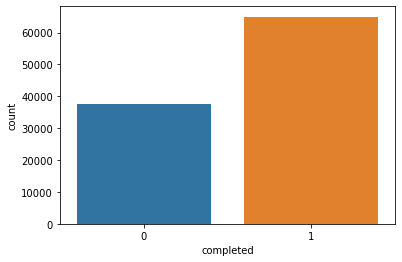

In [15]:
sns.countplot(x = 'completed', data = full_data)
plt.show()

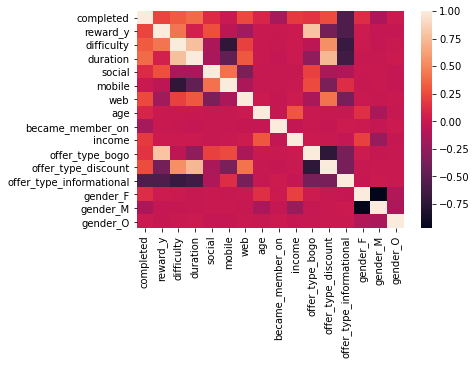

In [16]:
corrMatrix = full_data.corr()
sns.heatmap(corrMatrix, annot = False)
plt.show()

In [17]:
full_data.to_csv('full_data.csv', index = False)

# Logistic Regression - Full Model (Baseline)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
model = LogisticRegression(solver = 'liblinear')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(full_data, full_data['completed'],
                                                    test_size = 0.2, random_state = 25)

In [21]:
X_train.head()

,completed,reward_y,difficulty,duration,social,mobile,web,age,became_member_on,income,offer_type_bogo,offer_type_discount,offer_type_informational,gender_F,gender_M,gender_O
75981,1,3,7,7,1,1,1,42,20150201,72000.0,0,1,0,0,1,0
42706,1,10,10,7,1,1,0,64,20171119,55000.0,1,0,0,0,1,0
69061,1,10,10,7,1,1,0,46,20171127,40000.0,1,0,0,1,0,0
54223,0,0,0,4,0,1,1,53,20171021,94000.0,0,0,1,1,0,0
65945,0,5,5,7,0,1,1,46,20171013,67000.0,1,0,0,0,1,0


In [22]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.11      0.19      7578
           1       0.64      0.94      0.76     12961

    accuracy                           0.63     20539
   macro avg       0.58      0.53      0.47     20539
weighted avg       0.59      0.63      0.55     20539



In [25]:
import sklearn.metrics as metrics
metrics.confusion_matrix(y_test, predictions)

array([[  862,  6716],
       [  825, 12136]])

Calculating Baseline Accuracy

In [26]:
(sum(full_data['completed']))/(full_data.shape[0])#

0.6328766322923666

# Logistic Regression

In [27]:
log_reg_data = full_data.drop(['duration', 'became_member_on', 'gender_F', 'gender_M', 'gender_O'], axis = 1)

In [28]:
log_reg_data.head()

,completed,reward_y,difficulty,social,mobile,web,age,income,offer_type_bogo,offer_type_discount,offer_type_informational
0,1,5,5,0,1,1,75,100000.0,1,0,0
1,0,0,0,1,1,0,75,100000.0,0,0,1
2,1,10,10,1,1,0,75,100000.0,1,0,0
3,1,5,5,1,1,1,75,100000.0,1,0,0
4,0,2,10,0,1,1,68,70000.0,0,1,0


In [29]:
log_reg_data.to_csv('log_reg_data.csv', index = False)

Running the Logistic Regression

In [30]:
model2 = LogisticRegression(solver = 'liblinear')

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(log_reg_data, log_reg_data['completed'],
                                                    test_size = 0.2, random_state = 25)

In [32]:
model2.fit(X_train2, y_train2)

LogisticRegression(solver='liblinear')

In [33]:
y_pred = model2.predict(X_test2)

In [34]:
from scipy import stats
print(stats.describe(y_pred))

DescribeResult(nobs=20539, minmax=(0, 1), mean=0.828180534592726, variance=0.14230446521461343, skewness=-1.7399794645229254, kurtosis=1.027528536961488)


In [35]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63      7578
           1       0.76      1.00      0.86     12961

    accuracy                           0.80     20539
   macro avg       0.88      0.73      0.75     20539
weighted avg       0.85      0.80      0.78     20539



In [36]:
metrics.confusion_matrix(y_test2, y_pred)

array([[ 3512,  4066],
       [   17, 12944]])

# Interpretation

<AxesSubplot:ylabel='count'>

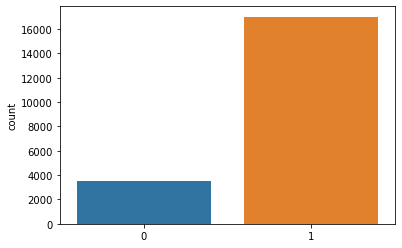

In [37]:
sns.countplot(x = y_pred)

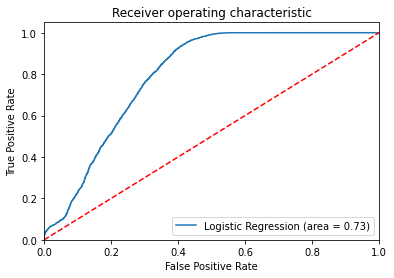

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test2, y_pred)
fpr, tpr, thresholds = roc_curve(y_test2, model2.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
cols = X_test2.columns
print(cols)

Index(['completed', 'reward_y', 'difficulty', 'social', 'mobile', 'web', 'age',
       'income', 'offer_type_bogo', 'offer_type_discount',
       'offer_type_informational'],
      dtype='object')


In [40]:
coefficients = model2.coef_
print(coefficients)

[[ 4.22666805e-01  5.46226444e-02  1.08553370e-01  1.96449471e-02
  -1.03255921e-02  4.41740700e-02 -1.55632040e-02  3.47594605e-06
   3.16570961e-02  6.99769726e-02 -1.52613071e-01]]


Logistic Regression for Age Group

In [41]:
college_age = log_reg_data[log_reg_data['age'] <= 35]
college_age.describe()

,completed,reward_y,difficulty,social,mobile,web,age,income,offer_type_bogo,offer_type_discount,offer_type_informational
count,15464.000000,15464.000000,15464.00000,15464.000000,15464.000000,15464.000000,15464.000000,15464.000000,15464.000000,15464.00000,15464.000000
mean,0.529811,4.429255,7.81680,0.674082,0.922206,0.800375,26.741593,51187.661666,0.418585,0.42059,0.160825
std,0.499127,3.432977,5.00789,0.468732,0.267855,0.399731,5.065180,12934.293891,0.493343,0.49367,0.367381
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,5.00000,0.000000,1.000000,1.000000,22.000000,40000.000000,0.000000,0.00000,0.000000
50%,1.000000,3.000000,10.00000,1.000000,1.000000,1.000000,27.000000,51000.000000,0.000000,0.00000,0.000000
75%,1.000000,5.000000,10.00000,1.000000,1.000000,1.000000,31.000000,62000.000000,1.000000,1.00000,0.000000
max,1.000000,10.000000,20.00000,1.000000,1.000000,1.000000,35.000000,75000.000000,1.000000,1.00000,1.000000


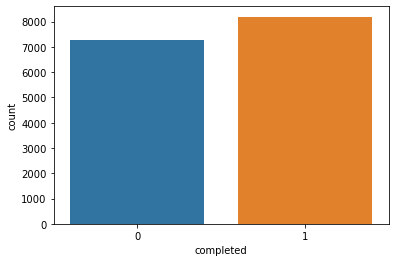

In [42]:
sns.countplot(x = 'completed', data = college_age)
plt.show()

In [43]:
model3 = LogisticRegression()

In [44]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(college_age, college_age['completed'],
                                                    test_size = 0.2, random_state = 25)

In [45]:
model3.fit(X_train3, y_train3)

LogisticRegression()

In [46]:
y_pred3 = model3.predict(X_test3)

In [47]:
print(stats.describe(y_pred3))

DescribeResult(nobs=3093, minmax=(0, 1), mean=0.6886517943743938, variance=0.21447984410819576, skewness=-0.8148316895450667, kurtosis=-1.336049317713132)


In [48]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54      1489
           1       0.61      0.81      0.70      1604

    accuracy                           0.63      3093
   macro avg       0.65      0.63      0.62      3093
weighted avg       0.65      0.63      0.62      3093



In [49]:
metrics.confusion_matrix(y_test2, y_pred)

array([[ 3512,  4066],
       [   17, 12944]])

Baseline Accuracy

In [50]:
(sum(college_age['completed']))/(college_age.shape[0])

0.5298111743404035

/Users/taylorcox/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


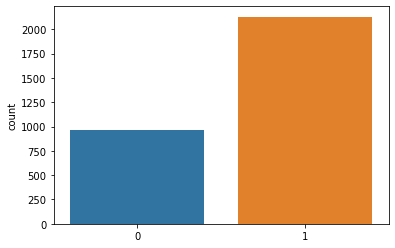

In [51]:
sns.countplot(y_pred3)
plt.show()

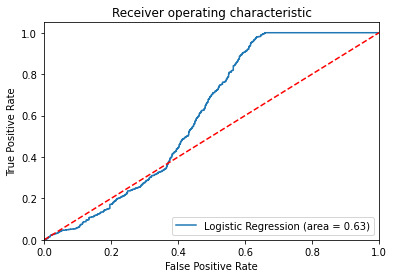

In [52]:
logit_roc_auc3 = roc_auc_score(y_test3, y_pred3)
fpr, tpr, thresholds = roc_curve(y_test3, model3.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
model3.coef_

array([[ 4.35939981e-02,  2.98208524e-02,  8.74914679e-02,
         4.49757709e-03,  1.10780371e-04,  7.83417150e-03,
        -1.40757478e-02, -5.55571762e-06,  2.77008130e-03,
         1.15129576e-02, -1.53339211e-02]])